<a href="https://colab.research.google.com/github/SanidhyaSaxena04/Cryptography-Signature-Simulation/blob/main/RSA_ElGamal_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycryptodome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.1 MB/s eta 0:00:00


In [ ]:
# Cell 1: All necessary imports for the project

import time
import hashlib
import matplotlib.pyplot as plt
import numpy as np

from Crypto.PublicKey import RSA, ElGamal
from Crypto.Signature import pkcs1_15
from Crypto.Hash import SHA256
from Crypto.Cipher import PKCS1_OAEP
from Crypto.Util.number import inverse, bytes_to_long
from Crypto.Random import get_random_bytes

In [ ]:
# Cell 2: All helper functions for key generation, signing, and encryption

# --- Key Generation Functions ---
def generate_rsa_keys():
    """Generates a new RSA key pair of 1024 bits."""
    return RSA.generate(1024)

def generate_elgamal_keys():
    """Generates a new ElGamal key pair of 1024 bits."""
    return ElGamal.generate(1024, get_random_bytes)

# --- Custom ElGamal Signature Functions ---
def sign_elgamal(key, message_hash_bytes):
    """Manually creates an ElGamal signature."""
    p = int(key.p)
    g = int(key.g)
    x = int(key.x)
    h = bytes_to_long(message_hash_bytes)

    while True:
        k = int.from_bytes(get_random_bytes(20), 'big')
        if 1 < k < p - 1:
            try:
                k_inv = inverse(k, p - 1)
                break
            except ValueError:
                continue

    r = pow(g, k, p)
    s = (k_inv * (h - x * r)) % (p - 1)
    return r, s

def verify_elgamal(key, message_hash_bytes, signature):
    """Manually verifies an ElGamal signature."""
    p = int(key.p)
    g = int(key.g)
    y = int(key.y)
    r, s = signature
    h = bytes_to_long(message_hash_bytes)

    if not (0 < r < p and 0 < s < p - 1):
        return False

    v1 = (pow(y, r, p) * pow(r, s, p)) % p
    v2 = pow(g, h, p)
    return v1 == v2

# --- RSA Encryption/Decryption Functions ---
def encrypt_rsa(public_key, data):
    """Encrypts data using the RSA public key."""
    cipher = PKCS1_OAEP.new(public_key)
    encrypted_data = cipher.encrypt(data)
    return encrypted_data

def decrypt_rsa(private_key, encrypted_data):
    """Decrypts data using the RSA private key."""
    cipher = PKCS1_OAEP.new(private_key)
    decrypted_data = cipher.decrypt(encrypted_data)
    return decrypted_data

In [ ]:
# Cell 3: The main script to run the performance tests and print results

# --- The Message to be Signed ---
message = b'This is the message we will use to test and compare the signature schemes.'

# =================================================================
# --- RSA PERFORMANCE TEST ---
# =================================================================
print("Running RSA Performance Test (1024-bit)...")
hash_object_rsa = SHA256.new(message)

start_time = time.time()
rsa_key = generate_rsa_keys()
rsa_gen_time = time.time() - start_time

signer = pkcs1_15.new(rsa_key)
start_time = time.time()
rsa_signature = signer.sign(hash_object_rsa)
rsa_sign_time = time.time() - start_time

verifier = pkcs1_15.new(rsa_key.publickey())
start_time = time.time()
verifier.verify(hash_object_rsa, rsa_signature)
rsa_verify_time = time.time() - start_time
rsa_sig_size = len(rsa_signature)
print("RSA Test Complete.\n")

# =================================================================
# --- ELGAMAL PERFORMANCE TEST ---
# =================================================================
print("Running ElGamal Performance Test (1024-bit)...")
message_hash_bytes = hashlib.sha256(message).digest()

start_time = time.time()
elgamal_key = generate_elgamal_keys()
elgamal_gen_time = time.time() - start_time

start_time = time.time()
elgamal_signature = sign_elgamal(elgamal_key, message_hash_bytes)
elgamal_sign_time = time.time() - start_time

start_time = time.time()
verify_elgamal(elgamal_key.publickey(), message_hash_bytes, elgamal_signature)
elgamal_verify_time = time.time() - start_time

r, s = elgamal_signature
elgamal_sig_size = (r.bit_length() + 7) // 8 + (s.bit_length() + 7) // 8
print("ElGamal Test Complete.\n")

# =================================================================
# --- FINAL RESULTS ---
# =================================================================
print("---" * 15)
print("     PERFORMANCE COMPARISON RESULTS")
print("---" * 15)
print(f"{'Metric':<25} | {'RSA (1024-bit)':<20} | {'ElGamal (1024-bit)':<20}")
print("---" * 15)
print(f"{'Key Generation Time (s)':<25} | {rsa_gen_time:<20.6f} | {elgamal_gen_time:<20.6f}")
print(f"{'Signing Time (s)':<25} | {rsa_sign_time:<20.6f} | {elgamal_sign_time:<20.6f}")
print(f"{'Verification Time (s)':<25} | {rsa_verify_time:<20.6f} | {elgamal_verify_time:<20.6f}")
print(f"{'Signature Size (bytes)':<25} | {rsa_sig_size:<20} | {elgamal_sig_size:<20}")
print("---" * 15)

Running RSA Performance Test (1024-bit)...
RSA Test Complete.

Running ElGamal Performance Test (1024-bit)...
ElGamal Test Complete.

---------------------------------------------
     PERFORMANCE COMPARISON RESULTS
---------------------------------------------
Metric                    | RSA (1024-bit)       | ElGamal (1024-bit)  
---------------------------------------------
Key Generation Time (s)   | 0.138117             | 31.215764           
Signing Time (s)          | 0.002199             | 0.001023            
Verification Time (s)     | 0.000419             | 0.026995            
Signature Size (bytes)    | 128                  | 256                 
---------------------------------------------


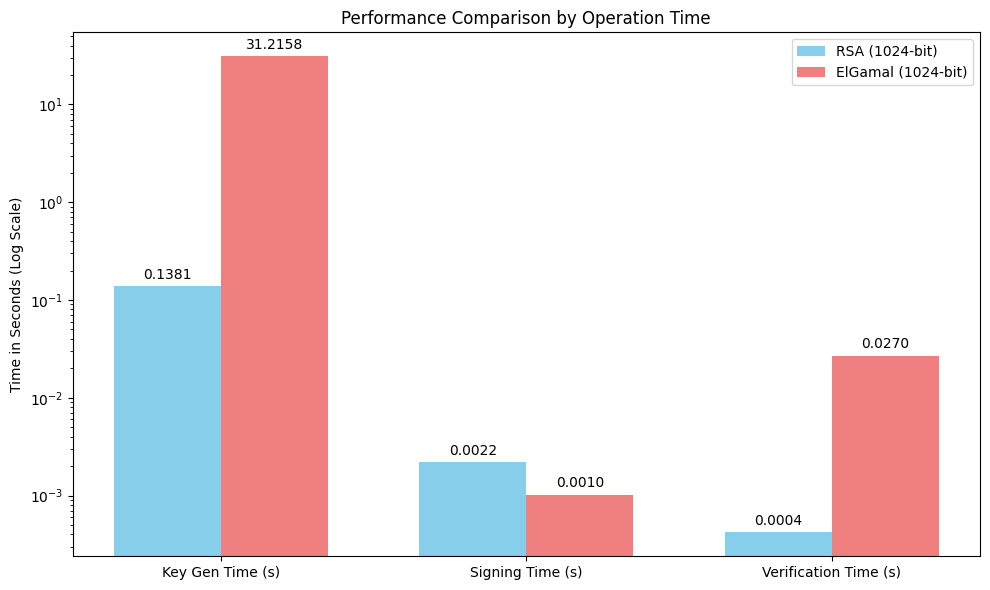

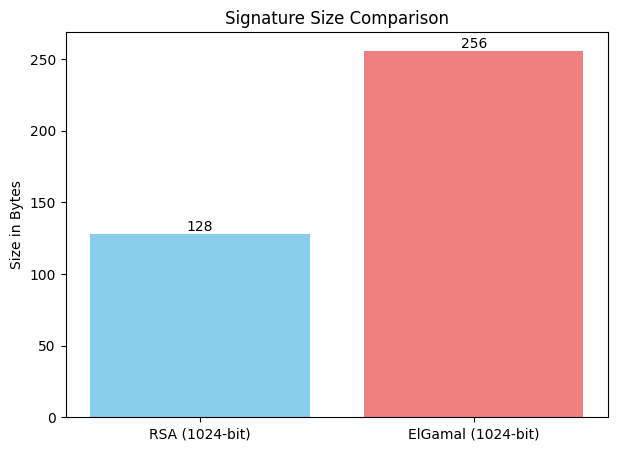

In [ ]:
# Cell 4: Code to generate charts from the performance results
# Note: You may need to update the numbers in the 'rsa_times' and 'elgamal_times'
# lists with the output you get from running Cell 3.

# --- Your Results Data ---
labels = ['Key Gen Time (s)', 'Signing Time (s)', 'Verification Time (s)']
rsa_times = [rsa_gen_time, rsa_sign_time, rsa_verify_time]
elgamal_times = [elgamal_gen_time, elgamal_sign_time, elgamal_verify_time]

rsa_size = rsa_sig_size
elgamal_size = elgamal_sig_size

# --- Chart 1: Performance Times (Logarithmic Scale) ---
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, rsa_times, width, label='RSA (1024-bit)', color='skyblue')
rects2 = ax.bar(x + width/2, elgamal_times, width, label='ElGamal (1024-bit)', color='lightcoral')

ax.set_ylabel('Time in Seconds (Log Scale)')
ax.set_title('Performance Comparison by Operation Time')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_yscale('log')
ax.bar_label(rects1, padding=3, fmt='%.4f')
ax.bar_label(rects2, padding=3, fmt='%.4f')

fig.tight_layout()
plt.show()


# --- Chart 2: Signature Size ---
fig, ax = plt.subplots(figsize=(7, 5))
algorithms = ['RSA (1024-bit)', 'ElGamal (1024-bit)']
sizes = [rsa_size, elgamal_size]
bars = ax.bar(algorithms, sizes, color=['skyblue', 'lightcoral'])

ax.set_ylabel('Size in Bytes')
ax.set_title('Signature Size Comparison')
ax.bar_label(bars)

plt.show()

In [ ]:
# Cell 5: Visual Demonstration of Digital Signature Authenticity

print("---" * 20)
print("      VISUAL DEMONSTRATION: HOW A DIGITAL SIGNATURE WORKS")
print("---" * 20)

# --- 1. SETUP: Generate a key pair for this demo ---
print("\nSTEP 1: SETUP")
print("First, the sender generates a new RSA key pair.")
sender_key = generate_rsa_keys()
sender_public_key = sender_key.publickey()
print("🔑 Key pair generated successfully.")


# --- 2. SENDER SIDE: Create the Signature ---
print("\nSTEP 2: SENDER creates the signature")
message = b'Hello VIT'
print(f"Original Message: '{message.decode()}'")

# Hash the message to create a unique fingerprint
hash_original = SHA256.new(message)
print(f"SHA-256 Hash of Message: {hash_original.hexdigest()}")

# Sign the HASH with the sender's PRIVATE key
signer = pkcs1_15.new(sender_key)
signature = signer.sign(hash_original)
print("✍️  Hash has been signed with the private key to create the signature.")


# --- 3. RECEIVER SIDE: Verify an Authentic Message ---
print("\nSTEP 3: RECEIVER verifies the AUTHENTIC message")
print("The receiver gets the message, the signature, and the sender's PUBLIC key.")
print(f"Received Message: '{message.decode()}'")

# Receiver independently calculates the hash of the received message
hash_received = SHA256.new(message)
print(f"Receiver's Calculated Hash: {hash_received.hexdigest()}")

# Receiver uses the PUBLIC key to verify the signature
verifier = pkcs1_15.new(sender_public_key)
try:
    verifier.verify(hash_received, signature)
    print("\n✅ SUCCESS: SIGNATURE IS VALID!")
    print("This proves the message is authentic and has not been changed.")
except (ValueError, TypeError):
    print("\n❌ FAILURE: SIGNATURE IS NOT VALID!")


# --- 4. RECEIVER SIDE: Attempt to Verify a TAMPERED Message ---
print("\nSTEP 4: An attacker intercepts and TAMPERS with the message...")
tampered_message = b'Hello VIT!' # Attacker adds an exclamation mark
print(f"Tampered Message: '{tampered_message.decode()}'")

# Receiver gets the tampered message but the original signature
hash_tampered = SHA256.new(tampered_message)
print(f"Receiver's Calculated Hash of Tampered Message: {hash_tampered.hexdigest()}")
print("🧐 NOTICE: The hash is now completely different!")

# Receiver tries to verify the original signature with the tampered message's hash
print("\nReceiver now attempts to verify the signature...")
try:
    verifier.verify(hash_tampered, signature)
    print("\n✅ SUCCESS: SIGNATURE IS VALID!")
except (ValueError, TypeError):
    print("\n❌ FAILURE: SIGNATURE IS NOT VALID!")
    print("This is the correct outcome. The system has detected that the message was altered.")

print("\n---" * 20)
print("This demonstration shows how digital signatures guarantee message integrity.")
print("---" * 20)

------------------------------------------------------------
      VISUAL DEMONSTRATION: HOW A DIGITAL SIGNATURE WORKS
------------------------------------------------------------

STEP 1: SETUP
First, the sender generates a new RSA key pair.
🔑 Key pair generated successfully.

STEP 2: SENDER creates the signature
Original Message: 'Hello VIT'
SHA-256 Hash of Message: e06122f43d377cd12ca2cd4bb815fec13743ddc301482bca448bd692da7b7764
✍️  Hash has been signed with the private key to create the signature.

STEP 3: RECEIVER verifies the AUTHENTIC message
The receiver gets the message, the signature, and the sender's PUBLIC key.
Received Message: 'Hello VIT'
Receiver's Calculated Hash: e06122f43d377cd12ca2cd4bb815fec13743ddc301482bca448bd692da7b7764

✅ SUCCESS: SIGNATURE IS VALID!
This proves the message is authentic and has not been changed.

STEP 4: An attacker intercepts and TAMPERS with the message...
Tampered Message: 'Hello VIT!'
Receiver's Calculated Hash of Tampered Message: ba31c4de